In [ ]:
import cv2
import torch
import numpy as np
import random

In [ ]:
class k_means_clustering:
  def __init__(self, img, k):
      self.img = img #Img
      self.k = k #Number of clusters
  def initialization(self): #Find the initial centroid
      height, width = self.img_process()
      x_coords = np.random.randint(0, height, self.k)
      y_coords = np.random.randint(0, width, self.k)
      centroid = []
      for i in range(self.k):
        centroid.append(img[x_coords[i]][y_coords[i]])
      return centroid
  def centroid(self, clustering_group): #Find the centroid of each clustering_group
      centroid_values = []
      height, width = self.img_process()
      for i in range(len(clustering_group)):
        centroid_values.append(sum(clustering_group[i])/ len(clustering_group[i]))
      return centroid_values #A list containing the location of centroid of each cluster.
  def distance(self, point, centroid):
       d = []
       for i in range(len(centroid)):
          if point > centroid[i]:
            d.append((point - centroid[i])**2)
          else:
            d.append((centroid[i] - point)**2)
       return d
  def clustering(self, height, width, centroid): #parameters : centroid, (list)
      clustering_group = []
      pixel_group = []
      for a in range(self.k):
        dist = []
        pixel = []
        for i in range(height):
          for j in range(width):
            d = self.distance(self.img[i][j], centroid) #Copy distances between a point and centroids
            for p in range(len(d)):
              if d[p] == min(d) and p == a: #Find a minimum distance point and if it belongs to kth centroid, append it
                dist.append(self.img[i][j]) #Find the pixel at which d is at minimum within the cluster
                pixel.append((i, j))
        clustering_group.append(dist) #Append the list to clustrering_group
        pixel_group.append(pixel)
      return clustering_group, pixel_group #Return 2d array
  def img_process(self):
      height = self.img.shape[0]
      width = self.img.shape[1]
      return height, width
  def assinging_values(self, centroid, pixel_group, clustering_group):
      for i in range(len(clustering_group)):
        target_values = round(centroid[i])
        for j in range(len(clustering_group[i])):
          height, width = pixel_group[i][j]
          self.img[height][width] = target_values
  def cost_function(self, centroid, clustering_group):
      cost = 0
      img_height, img_width = self.img_process()
      for i in range(len(centroid)):
        cost += sum(self.distance(centroid[i], clustering_group[i])) #Find the sum of squared means of each cluster.
      return np.sqrt(cost / (img_height * img_width)) #Find the sum of standard deviation of every clusters.
  def main(self, centroid):
      height, width = self.img_process() #Obtain the height and width of the image
      clustering_group, pixel_group = self.clustering(height, width, centroid) #Clustering the image with k clusters and obtaiing image valuses of each cluster and their locations
      return clustering_group, pixel_group

In [ ]:
#Q1 : K-means clustering
def load_raw_file(file_path, dtype, shape):

    with open(file_path, 'rb') as file:
        data = np.fromfile(file, dtype=dtype)
    return data.reshape(shape)

# Example usage
file_path = '/content/Golf.raw'
dtype = np.uint8  # or np.float32, np.int16, etc.
shape = (800, 540)
img = load_raw_file(file_path, dtype, shape)
print(img)

[[ 52  54  57 ...  97  99 100]
 [100  99  99 ...  43  44  47]
 [ 46  47  51 ...  57  60  63]
 ...
 [161 152 146 ... 132 114 132]
 [146 146 149 ... 166 172 171]
 [163 157 158 ... 147 161 165]]


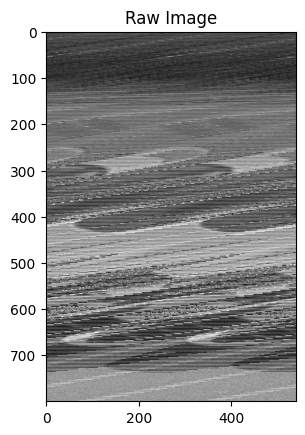

In [ ]:
import matplotlib.pyplot as plt
def load_raw_file(file_path, dtype, shape):

    with open(file_path, 'rb') as file:
        data = np.fromfile(file, dtype=dtype)
    return data.reshape(shape)

# Example usage
file_path = '/content/Golf.raw'
dtype = np.uint8  # or np.float32, np.int16, etc.
shape = (800, 540)
img = load_raw_file(file_path, dtype, shape)
plt.imshow(img, cmap='gray')
plt.title('Raw Image')
plt.show()

In [ ]:
img = load_raw_file(file_path, dtype, shape)
i = 0
costs = 0
k = 2
k_means = k_means_clustering(img, k)
centroid = k_means.initialization()
print("initial centroid : ", centroid)
while True:
  clustering_group, pixel_group = k_means.main(centroid) #return the locations and values of each cluster.
  centroid = k_means.centroid(clustering_group) #Updating : find new centroids of each cluster and return the location of them
  if costs == k_means.cost_function(centroid, clustering_group):
    break
  else:
    costs = k_means.cost_function(centroid, clustering_group)
    i = i + 1
  print(i,"th centroid : ", centroid)
  print("costs : ", costs)
k_means.assinging_values(centroid, pixel_group, clustering_group) #Assigning the image with the centroid of each cluster

initial centroid :  [148, 228]
1 th centroid :  [100.81132663912635, 227.33589349718383]
costs :  48.915007247674474
2 th centroid :  [96.95668250740343, 208.62790317838827]
costs :  47.42120829080005
3 th centroid :  [82.00257059056466, 181.22622263345622]
costs :  40.73023403373535
4 th centroid :  [67.26166958078176, 170.41320562718337]
costs :  33.79752526864916
5 th centroid :  [63.64499548547645, 167.2181259300822]
costs :  33.027961512019864
6 th centroid :  [62.584775987997595, 166.15748072863434]
costs :  32.96022771317993
7 th centroid :  [62.25378234828794, 165.81841299964418]
costs :  32.952134296806754


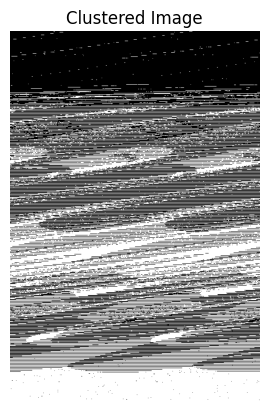

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(k_means.img, cmap='gray')
plt.title('Clustered Image')
plt.axis('off')  # Hide axes for better visualization
plt.show()

In [ ]:
img = load_raw_file(file_path, dtype, shape)
i = 0
costs = 0
k = 4
k_means = k_means_clustering(img, k)
centroid = k_means.initialization()
print("initial centroid : ", centroid)
while True:
  clustering_group, pixel_group = k_means.main(centroid) #return the locations and values of each cluster.
  centroid = k_means.centroid(clustering_group) #Updating : find new centroids of each cluster and return the location of them
  if costs == k_means.cost_function(centroid, clustering_group): #Break the loop if it reaches convergence (Two consecutive identical costs)
    break;
  else:
    costs = k_means.cost_function(centroid, clustering_group)
    i = i + 1
  print(i,"th centroid : ", centroid)
  print("costs : ", costs)
k_means.assinging_values(centroid, pixel_group, clustering_group) #Assigning the image with the centroid of each cluster

initial centroid :  [163, 157, 127, 162]
1 th centroid :  [203.06203548567254, 152.19760568735668, 72.2328155631473, 160.92659287405695]
costs :  32.483945473324006
2 th centroid :  [225.89898418534491, 141.99816403797493, 61.56913429253299, 162.82690272444134]
costs :  24.339780645194576
3 th centroid :  [228.6029319001842, 131.25110828075788, 56.644341977499074, 161.33152859155973]
costs :  22.474857191341247
4 th centroid :  [228.6029319001842, 118.15651591153713, 51.054265402843605, 158.79328176064203]
costs :  20.2494545794162
5 th centroid :  [228.44821782924316, 106.07903899721448, 44.45524806443302, 156.42984535900067]
costs :  17.460624254951465
6 th centroid :  [228.2780791440642, 99.51697395113369, 39.608805060485736, 155.04728397602278]
costs :  15.860604792318789
7 th centroid :  [228.09221816011342, 96.12127827660315, 36.76882048538251, 154.33458722070793]
costs :  15.338186200623404
8 th centroid :  [228.09221816011342, 94.36063560614177, 35.257502717105496, 153.99416113

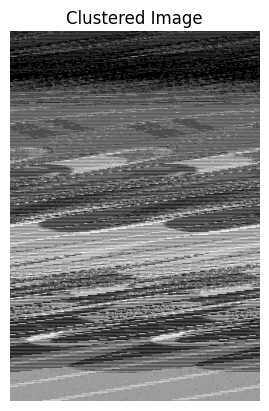

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(k_means.img, cmap='gray')
plt.title('Clustered Image')
plt.axis('off')  # Hide axes for better visualization
plt.show()

In [ ]:
img = load_raw_file(file_path, dtype, shape)
i = 0
costs = 0
k = 8
k_means = k_means_clustering(img, k)
centroid = k_means.initialization()
print("initial centroid : ", centroid)
while True:
  clustering_group, pixel_group = k_means.main(centroid) #return the locations and values of each cluster.
  centroid = k_means.centroid(clustering_group) #Updating : find new centroids of each cluster and return the location of them
  if costs == k_means.cost_function(centroid, clustering_group):
    break;
  else:
    costs = k_means.cost_function(centroid, clustering_group)
    i = i + 1
  print(i,"th centroid : ", centroid)
  print("costs : ", costs)
k_means.assinging_values(centroid, pixel_group, clustering_group) #Assigning the image with the centroid of each cluster

initial centroid :  [59, 156, 164, 160, 109, 34, 226, 201]
1 th centroid :  [65.1333501386438, 149.4175361813242, 166.9019684920323, 159.87568647029457, 102.96588328383669, 22.847148858295554, 231.30683226315196, 198.8708314471103]
costs :  10.668443498750317
2 th centroid :  [63.78686474775611, 145.18673048760644, 168.83179313636165, 158.76719044847715, 101.64928035290278, 21.053756350502795, 231.6249892386719, 200.29143798024148]
costs :  9.939474324445282
3 th centroid :  [62.119186195579715, 141.78263214670983, 169.13965934672726, 157.4139560557919, 99.90605802331116, 20.42377245047406, 231.6249892386719, 201.51206947306446]
costs :  9.621560180224007
4 th centroid :  [61.10019957509818, 138.88715654712885, 169.28847934023395, 156.63218953273258, 98.57789453551298, 19.804424708587742, 231.79725534569297, 202.83383685800604]
costs :  9.418086815087447
5 th centroid :  [59.62262449439692, 136.27202762293035, 168.38891024073234, 155.55500413564928, 97.19129943627966, 19.2143055080118,

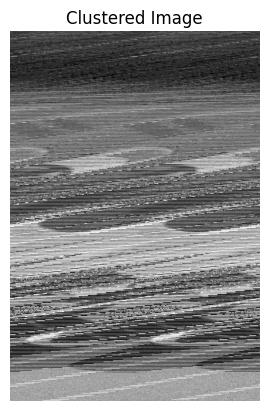

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(k_means.img, cmap='gray')
plt.title('Clustered Image')
plt.axis('off')  # Hide axes for better visualization
plt.show()





